# Sentiment Analysis with NLP

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Renua-Meireles/sentiment-analisys-with-MLP/blob/main/MLP_Sentiment_Analysis_(PIBIC_2021).ipynb)

## Loading Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os

In [79]:
BASE_PATH = './data/'
datasetpath = f'{BASE_PATH}/movie.csv'
os.listdir(BASE_PATH)

['movie.csv']

## Loading Dataset

In [80]:
df = pd.read_csv(datasetpath, encoding='utf-8')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [81]:
df.loc[0, 'text']

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [82]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [84]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [85]:
df.columns

Index(['text', 'label'], dtype='object')

In [86]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
def clean_text(text:str):
    text = text.lower()
    text = re.sub(r',|\.|-|\+|\(|\)|\/|"|\'|#', ' ', text)
    text = re.sub(r'\s\S\s', ' ', text)
    text = re.sub(r'  +', ' ', text)
    text = ' '.join(filter(lambda word: word not in stopwords, text.split(' ')))
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
df['text_clean'] = df['text'].apply(clean_text)

In [88]:
unique_words = set()
cleaned_unique_words = set()
for text, text_clean in df[['text', 'text_clean']].values:
    words = text.split()
    clean_words = text_clean.split()
    unique_words.update(words)
    cleaned_unique_words.update(clean_words)

In [89]:
print(len(unique_words))
print(len(cleaned_unique_words))

381542
128153


Min: 4
Max: 2470
Mean: 231.328975
Standard Deviation: 171.1783333281242


<AxesSubplot:>

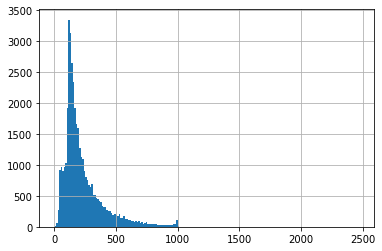

In [90]:
df['word_count'] = df['text'].apply(lambda x: len(x.split(' ')))

# print word count statistics
print('Min:', df['word_count'].min())
print('Max:', df['word_count'].max())
print('Mean:', df['word_count'].mean())
print('Standard Deviation:', df['word_count'].std())

#show the distribution of word count
df['word_count'].hist(bins=200)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
train_x, test_x, y_train, y_test = train_test_split(df.text_clean, df.label, test_size=0.25,random_state=123)

### Tokenzation (method 1)

In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>") # any unknown words will be replaced by oov_token

In [94]:
vocab_size = len(cleaned_unique_words)//2
max_length = int(df['word_count'].mean()) # the length of each review. If originally the comment is longer than "max_length" words, it will be truncated
trunc_type = 'post' # the review will be truncated at the end when a review is bigger than "max_length" or padded when a review is smaller than "max_length"
padding_type = 'post' # padding will be applied at the end, not in the beginning
oov_tok = '<OOV>' # any unknown words will be replaced by oov_token

In [95]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index

In [96]:
word_index

{'<OOV>': 1,
 'br': 2,
 'movie': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'good': 7,
 'time': 8,
 'even': 9,
 'would': 10,
 'really': 11,
 'story': 12,
 'see': 13,
 'well': 14,
 'much': 15,
 'bad': 16,
 'get': 17,
 'great': 18,
 'people': 19,
 'also': 20,
 'first': 21,
 'make': 22,
 'made': 23,
 'way': 24,
 'could': 25,
 'movies': 26,
 'the': 27,
 'characters': 28,
 'think': 29,
 'watch': 30,
 'character': 31,
 'films': 32,
 'two': 33,
 'seen': 34,
 'many': 35,
 'love': 36,
 'plot': 37,
 'life': 38,
 'never': 39,
 'acting': 40,
 'show': 41,
 'know': 42,
 'little': 43,
 'best': 44,
 'ever': 45,
 'man': 46,
 'better': 47,
 'end': 48,
 'still': 49,
 'scene': 50,
 'say': 51,
 'scenes': 52,
 'something': 53,
 'go': 54,
 'back': 55,
 'real': 56,
 'thing': 57,
 'watching': 58,
 'actors': 59,
 'director': 60,
 'years': 61,
 'i': 62,
 '10': 63,
 'though': 64,
 'funny': 65,
 'actually': 66,
 'another': 67,
 'work': 68,
 'old': 69,
 'nothing': 70,
 'makes': 71,
 'look': 72,
 'going': 73,
 'new': 74

In [97]:
seq = tokenizer.texts_to_sequences(train_x)
train_x_tokenized_padded = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)
seq = tokenizer.texts_to_sequences(test_x)
test_x_tokenized_padded = pad_sequences(seq, maxlen=max_length)

In [98]:
print(train_x_tokenized_padded.shape)
train_x_tokenized_padded

(30000, 231)


array([[    0,     0,     0, ...,    58, 13882,    99],
       [  454,    13,    20, ..., 10260, 12183,  2123],
       [    0,     0,     0, ...,   179, 35607, 23266],
       ...,
       [    0,     0,     0, ...,     3,     2,     2],
       [    0,     0,     0, ...,    80,    45,    34],
       [    0,     0,     0, ...,   234,     2,     2]])

In [99]:
train_x_tokenized_padded_scaled = train_x_tokenized_padded / np.linalg.norm(train_x_tokenized_padded, axis=1, keepdims=True)
test_x_tokenized_padded_scaled = test_x_tokenized_padded / np.linalg.norm(test_x_tokenized_padded, axis=1, keepdims=True)

## Building the model

In [100]:
model = tf.keras.Sequential([
    layers.Input(shape=(max_length, )),
    layers.Dense(64, activation='relu'),
    layers.Dense(68, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [101]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [102]:
model = tf.keras.Sequential([
    layers.Input(shape=(max_length, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile('adam', tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                7424      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14,817
Trainable params: 14,817
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [109]:
# Create a callback that saves the model's weights
from pathlib import Path

WEIGHTS_PATH = './Weights_per_epochs'
Path(WEIGHTS_PATH).mkdir(parents=True, exist_ok=True)

checkpoint_path = "./Weights_per_epochs/weights{epoch:02d}.hdf5"
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [115]:
for file in Path(WEIGHTS_PATH).glob('*'):
    file.unlink()

epochs = 200
history = model.fit(train_x_tokenized_padded_scaled, y_train, 
                    epochs=epochs, 
                    validation_data=(test_x_tokenized_padded_scaled, y_test),
                    callbacks=[callback])

Epoch 1/200
919/938 [============================>.] - ETA: 0s - loss: 0.4584 - accuracy: 0.7532
Epoch 1: saving model to ./Weights_per_epochs\weights01.hdf5
938/938 [==============================] - 3s 3ms/step - loss: 0.4589 - accuracy: 0.7527 - val_loss: 1.2419 - val_accuracy: 0.5304
Epoch 2/200
919/938 [============================>.] - ETA: 0s - loss: 0.4553 - accuracy: 0.7551
Epoch 2: saving model to ./Weights_per_epochs\weights02.hdf5
938/938 [==============================] - 3s 3ms/step - loss: 0.4561 - accuracy: 0.7548 - val_loss: 1.3645 - val_accuracy: 0.5225
Epoch 3/200
928/938 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7567
Epoch 3: saving model to ./Weights_per_epochs\weights03.hdf5
938/938 [==============================] - 2s 2ms/step - loss: 0.4530 - accuracy: 0.7569 - val_loss: 1.3333 - val_accuracy: 0.5213
Epoch 4/200
932/938 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.7597
Epoch 4: saving model to ./Weights_p

### Model Performance

<Figure size 432x288 with 0 Axes>

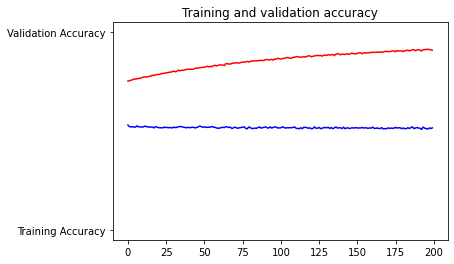

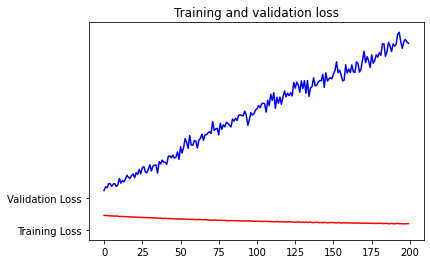

<Figure size 432x288 with 0 Axes>

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epcs=range(len(acc))

plt.plot(epcs, acc, 'r', 'Training Accuracy')
plt.plot(epcs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epcs, loss, 'r', 'Training Loss')
plt.plot(epcs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

## Histograms

In [117]:
list_weights = os.listdir('./Weights_per_epochs')
len(list_weights)

200

In [118]:
def get_weights_from_layer(model, weights_dir, layer_number, num_epochs):
    weights = np.array([])
    for i in range(num_epochs):
        model.load_weights(f'{weights_dir}/{list_weights[i]}')
        weights = np.append(weights, model.get_weights()[0][layer_number])
    
    # weights = weights.reshape(num_epochs, -1)
    return weights

In [119]:
weights_from_layer0 = get_weights_from_layer(model, './Weights_per_epochs', 0, epochs)
weights_from_layer1 = get_weights_from_layer(model, './Weights_per_epochs', 1, epochs)
weights_from_layer2 = get_weights_from_layer(model, './Weights_per_epochs', 2, epochs)
weights_from_layer3 = get_weights_from_layer(model, './Weights_per_epochs', 3, epochs)
weights_from_layer0.shape # (15, 32) - 15 epochs, 32 neurons in the layer

(6400,)

In [120]:
weights_from_layer0[:10] # all weights from the second neuron in the first layer

array([ 0.26874763, -0.35172808,  0.39677027,  0.11148636,  0.55349582,
        0.44793448, -0.09485618,  0.20126756, -0.16828735, -0.06945921])

In [121]:
from scipy.stats import norm
plt.style.use('seaborn-whitegrid')

In [122]:
def plot_weights_histogram(*weights):
    """This method plots the histogram of the weights of a layer along the epochs"""
    fig, ax = plt.subplots(figsize=(8, 6))
    _, bins1 = np.histogram(weights[0], bins=50)
    _, bins2 = np.histogram(weights[1], bins=50)
    _, bins3 = np.histogram(weights[2], bins=50)
    _, bins4 = np.histogram(weights[3], bins=50)
    # _, bins1, _ = ax.hist(weights[0], bins=50, label='Layer 0', histtype='bar', density=True)
    # _, bins2, _ = ax.hist(weights[1], bins=50, label='Layer 1', density=True)
    # _, bins3, _ = ax.hist(weights[2], bins=50, label='Layer 2', density=True)
    y1 = norm.pdf(bins1, weights[0].mean(), weights[0].std())
    y2 = norm.pdf(bins2, weights[1].mean(), weights[1].std())
    y3 = norm.pdf(bins3, weights[2].mean(), weights[2].std())
    y4 = norm.pdf(bins4, weights[3].mean(), weights[3].std())
    ax.plot(bins1, y1, '--', label='Layer 0')
    ax.plot(bins2, y2, '--', label='Layer 1')
    ax.plot(bins3, y3, '--', label='Layer 2')
    ax.plot(bins4, y4, '--', label='Layer 3')
    ax.legend(loc='best')
    ax.set_title('Histogram of weights')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Weight value')
    fig.tight_layout()
    ax.grid(False)
    

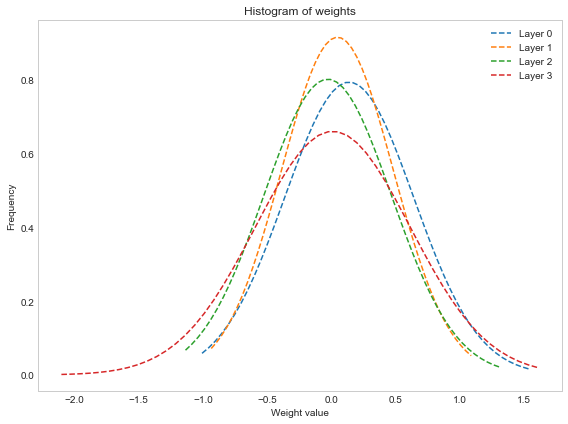

In [123]:
plot_weights_histogram(weights_from_layer0, weights_from_layer1, weights_from_layer2, weights_from_layer3)